## Data set reference

**Link:https://github.com/loem-ms/PatternRecognition/tree/master/dataset**

# Import libraries

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Load data set folder 

In [4]:
dataset_path = "..\\.\\dataset"

## Get all class folder from data set

In [5]:
classes = sorted(os.listdir(dataset_path))
print(f"Number of classes: {len(classes)}")
print(f"Class names: {classes}")

Number of classes: 10
Class names: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


## Count total images and per-class distribution

In [6]:
total_images = 0
class_count = []

for cls in classes:
    class_path = os.path.join(dataset_path, cls)
    count = len(os.listdir(class_path))
    class_count.append(count)
    total_images += count
    print(f"Class {cls}: {count} images")

print(f"Total images in dataset: {total_images}")

Class 0: 300 images
Class 1: 300 images
Class 2: 300 images
Class 3: 300 images
Class 4: 300 images
Class 5: 300 images
Class 6: 300 images
Class 7: 300 images
Class 8: 300 images
Class 9: 300 images
Total images in dataset: 3000


# 1. Class Distribution Visualization

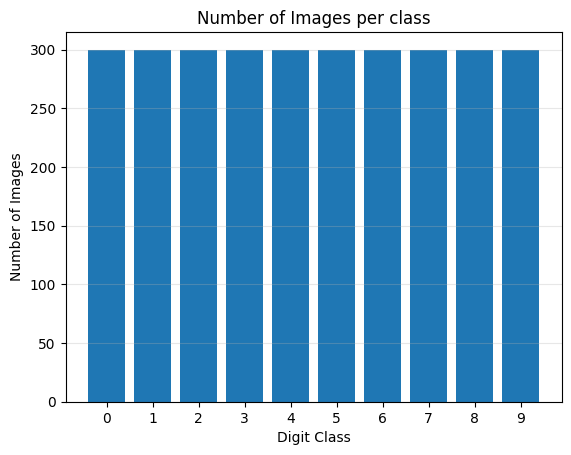

In [7]:
# Plot class distribution to check for imbalance data set
plt.Figure(figsize=(10, 5))
plt.bar(classes, class_count)
plt.title("Number of Images per class")
plt.xlabel("Digit Class")
plt.ylabel("Number of Images")
plt.xticks(classes)
plt.grid(axis='y', alpha=0.3)
plt.show()

## 2. Sample Images from Each Class

In [8]:
# let sample for 12 and 6
plt.Figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

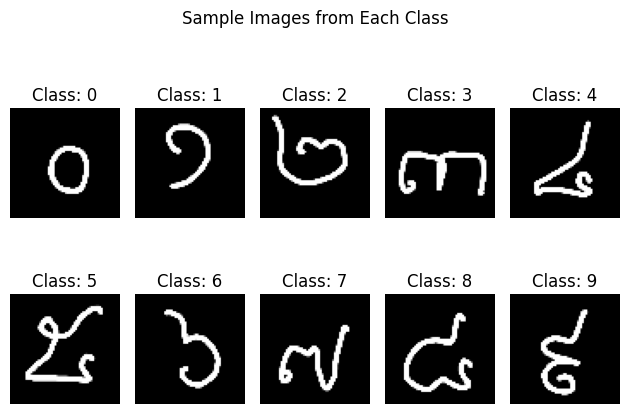

In [9]:
for i, cls in enumerate(classes):
    class_path = os.path.join(dataset_path, cls)
    images = os.listdir(class_path)

    # Get first image from each class
    imag_path = os.path.join(class_path, images[0]) # images[0] mean get first images
    img = cv2.imread(imag_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB


     # Display the image
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.title(f"Class: {cls}")
    plt.axis('off')

plt.suptitle('Sample Images from Each Class')
plt.tight_layout()
plt.show()


## Display sample images from each class

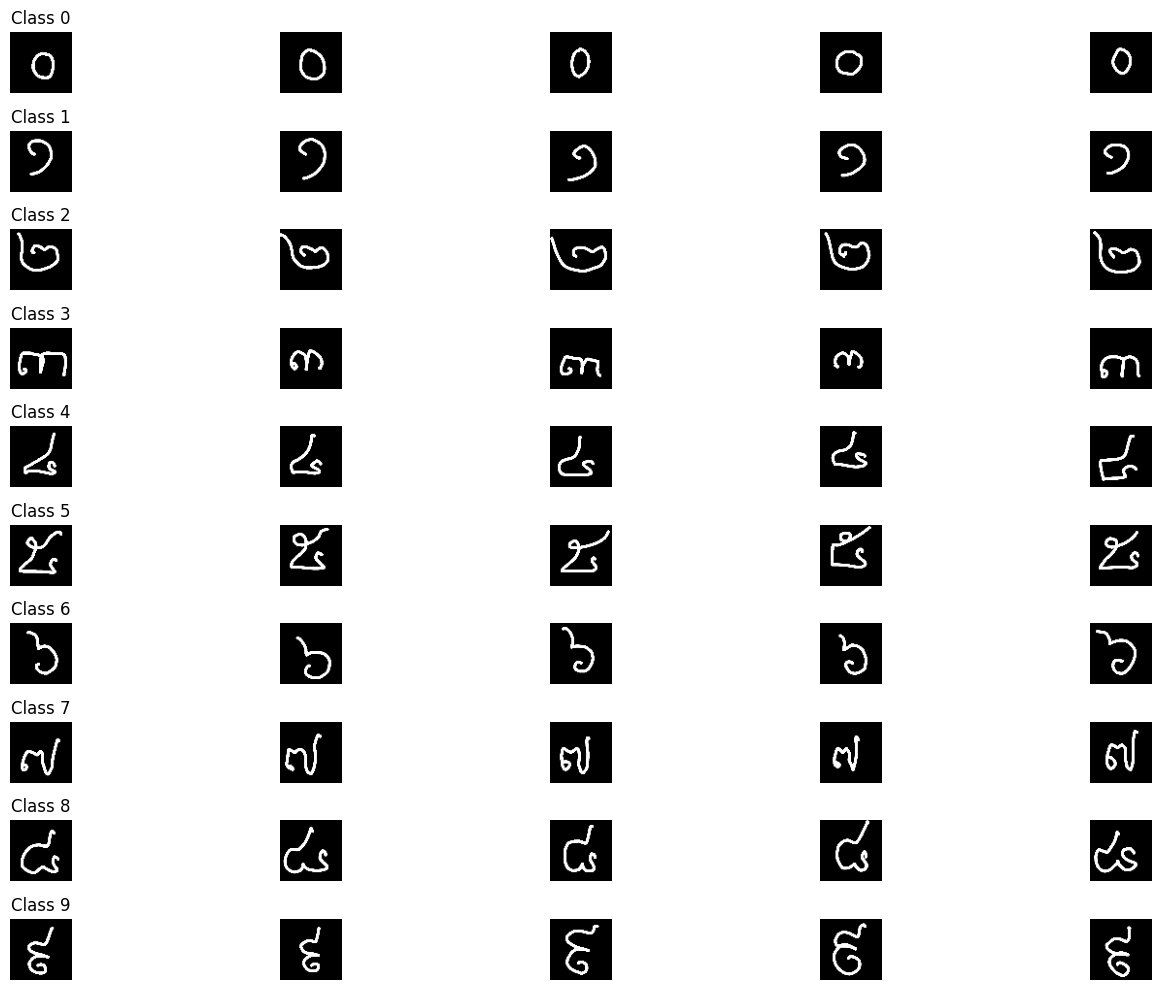

In [10]:

plt.figure(figsize=(15, 10))
for i, cls in enumerate(classes):
    class_path = os.path.join(dataset_path, cls)
    image_files = os.listdir(class_path)[:5]  # Get first 5 images
    
    for j, img_file in enumerate(image_files):
        img_path = os.path.join(class_path, img_file)
        img = plt.imread(img_path)
        
        plt.subplot(len(classes), 5, i*5 + j + 1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        if j == 0:
            plt.title(f"Class {cls}")
            
plt.tight_layout()
plt.show()

## 3.Images processing

### Check image properties (dimensions)

In [11]:
# remember 
# ======plt.imread() load certain images format 0 1 it automatic convert====
# ======but cv2.imread() keep images originaly that it take image 0-255 scale=====

# ==== that why our picture data set have pixel 0 to 1 ====
sample_class = classes[0]
sample_path = os.path.join(dataset_path, sample_class)
sample_img = os.path.join(sample_path, os.listdir(sample_path)[0])
img = plt.imread(sample_img)

print(f"Image shape: {img.shape}")
print(f"Image dtype: {img.dtype}")
print(f"Min pixel value: {img.min()}")
print(f"Max pixel value: {img.max()}")
print(f"Mean pixel value: {img.mean()}")

# Check if all images have the same dimensions
dimensions = {}
for cls in classes:
    class_path = os.path.join(dataset_path, cls)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        img = plt.imread(img_path)
        dim = img.shape
        dimensions[dim] = dimensions.get(dim, 0) + 1

print("Image dimensions distribution:")
for dim, count in dimensions.items():
    print(f"{dim}: {count} images")

Image shape: (64, 64, 4)
Image dtype: float32
Min pixel value: 0.0
Max pixel value: 1.0
Mean pixel value: 0.29419881105422974
Image dimensions distribution:
(64, 64, 4): 1500 images
(64, 64, 3): 1500 images


### 3.1 Select one sample image

In [12]:
sample_class = classes[0]
sample_path = os.path.join(dataset_path, sample_class)
sample_img_name = os.listdir(sample_path)[0]
img_path = os.path.join(sample_path, sample_img_name)

print(f"Processing image from class: {sample_class}")
print(f"Image path: {img_path}")

Processing image from class: 0
Image path: ..\.\dataset\0\0_001 (2).png


### Step 1: load the original images

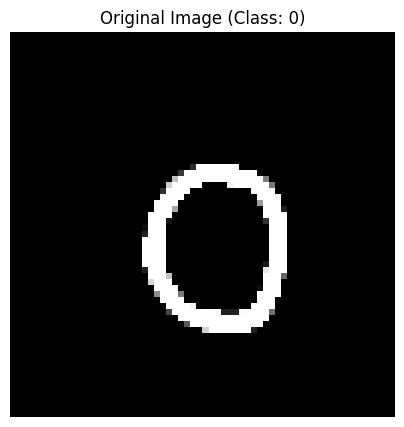

Original image size: 64x64 pixels


In [13]:
# Step 1: Load the original image
original_img = cv2.imread(img_path)
original_rgb = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

# Display original image
plt.figure(figsize=(5, 5))
plt.imshow(original_rgb)
plt.title(f"Original Image (Class: {sample_class})")
plt.axis('off')
plt.show()

print(f"Original image size: {original_img.shape[1]}x{original_img.shape[0]} pixels")

###  Step 2: Resize the image to 28x28 and convert to grayscale image

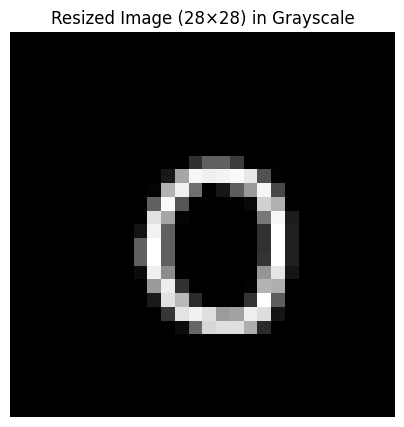

Image resized to 28x28 pixels and converted to grayscale
New shape: (28, 28)


In [14]:

resized = cv2.resize(original_img, (28, 28), interpolation=cv2.INTER_AREA)
# Convert the resized image to grayscale
resized_gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.figure(figsize=(5, 5))
plt.imshow(resized_gray, cmap='gray')
plt.title("Resized Image (28×28) in Grayscale")
plt.axis('off')
plt.show()

print("Image resized to 28x28 pixels and converted to grayscale")
print(f"New shape: {resized_gray.shape}")

### Step 3: Normalize pixel values from 0-255 to 0-1

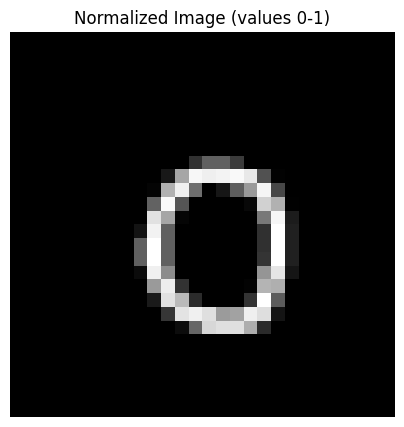

Pixel values normalized to range 0-1
Original values range: 0-255
Normalized values range: 0.0-1.0


In [15]:

normalized = resized / 255.0

# Display normalized image properly
plt.figure(figsize=(5, 5))
# For single-channel images use cmap='gray'
# For 3-channel images, convert to RGB first
if len(normalized.shape) == 2:
    plt.imshow(normalized, cmap='gray')
else:
    # Convert to RGB for display
    normalized_rgb = cv2.cvtColor((normalized*255).astype(np.uint8), cv2.COLOR_BGR2RGB)
    plt.imshow(normalized_rgb)
    
plt.title("Normalized Image (values 0-1)")
plt.axis('off')
plt.show()

print("Pixel values normalized to range 0-1")
print(f"Original values range: 0-255")
print(f"Normalized values range: {normalized.min():.1f}-{normalized.max():.1f}")

###  Step4: Show the 3 different

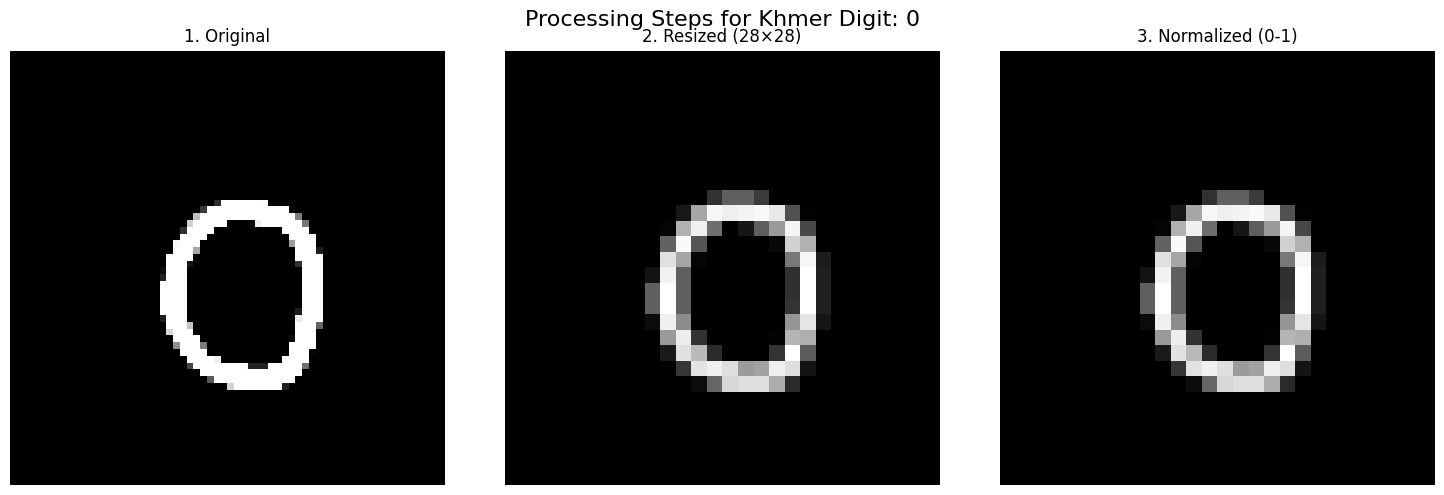

In [16]:

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original image
axes[0].imshow(original_rgb)
axes[0].set_title("1. Original")
axes[0].axis('off')

# Resized image
axes[1].imshow(normalized)
axes[1].set_title("2. Resized (28×28)")
axes[1].axis('off')

# Normalized image - properly convert for display
axes[2].imshow(normalized, cmap='gray')
    
axes[2].set_title("3. Normalized (0-1)")
axes[2].axis('off')

plt.suptitle(f"Processing Steps for Khmer Digit: {sample_class}", fontsize=16)
plt.tight_layout()
plt.show()

###  Process one image from each class (digits 0-9)

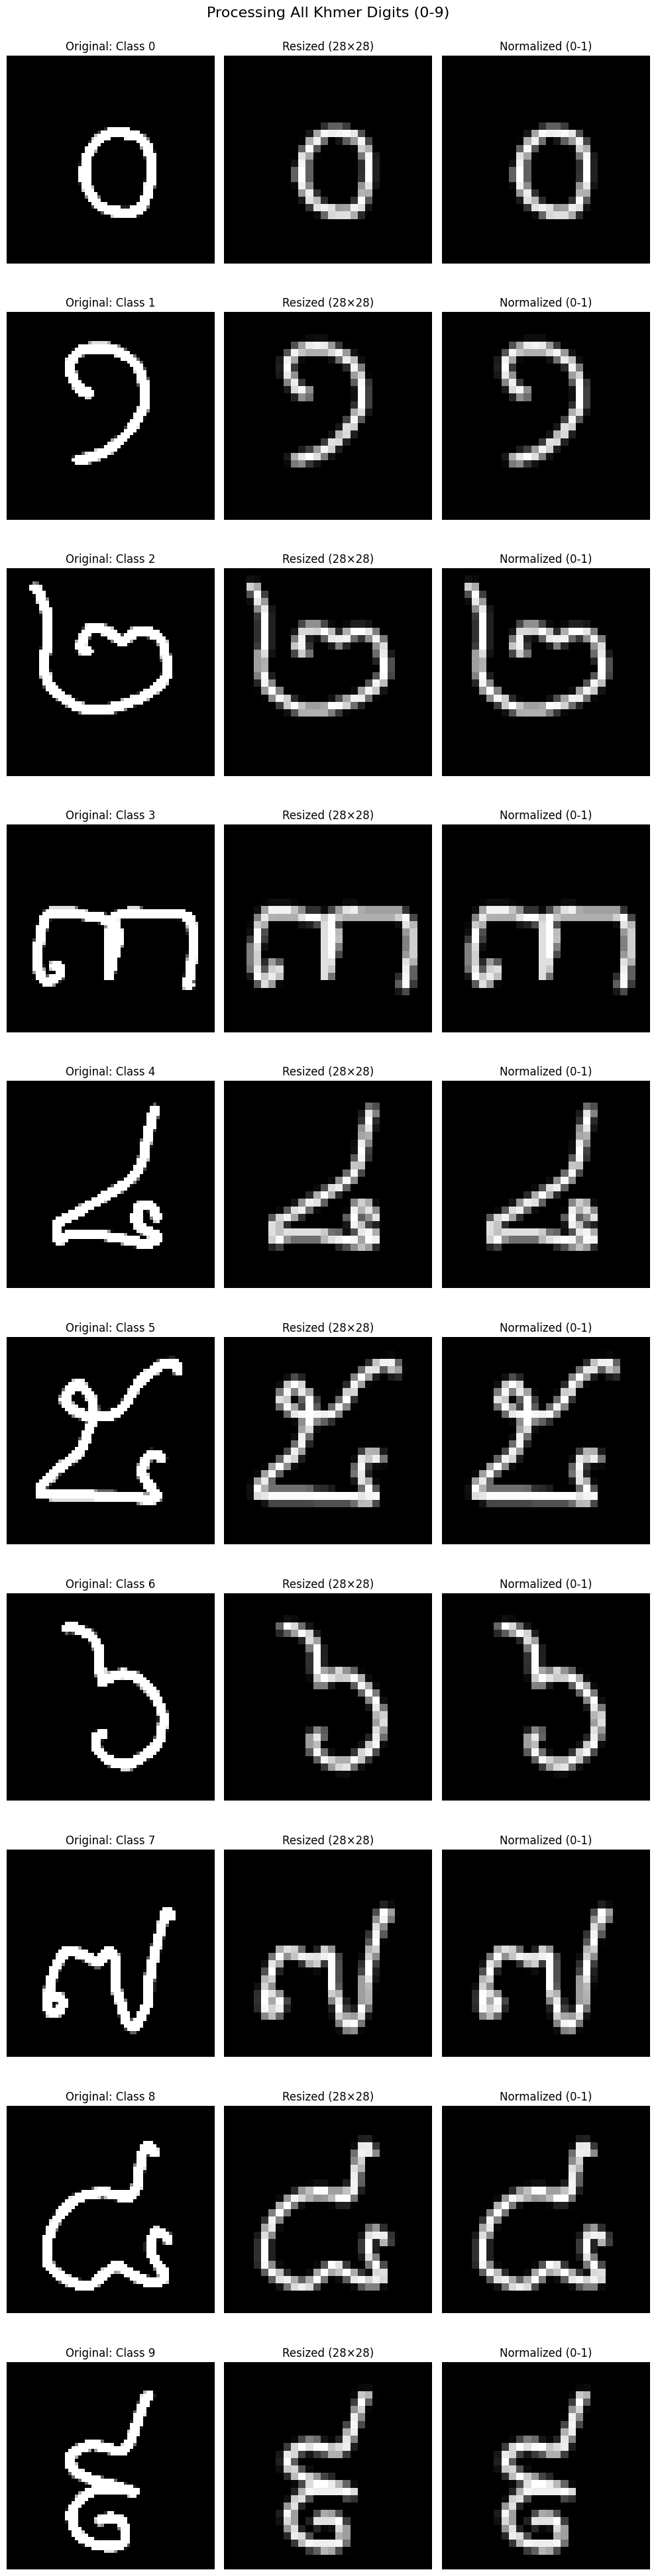

Processed Khmer digit classes in order: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [17]:

plt.figure(figsize=(10, 40))  # Taller figure to fit all 10 digits

# Process all classes in order
for i, digit_class in enumerate(classes):
    # Select an image from this class
    class_path = os.path.join(dataset_path, digit_class)
    img_name = os.listdir(class_path)[0]  # Just take first image
    img_path = os.path.join(class_path, img_name)
    
    # Process the image
    # Step 1: Load the image
    original = cv2.imread(img_path)
    original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    
    # Step 2: Resize the image
    resized = cv2.resize(original, (28, 28), interpolation=cv2.INTER_AREA)
    resized_gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    
    # Step 3: Normalize the image
    normalized = resized / 255.0
    
    # Display original image
    plt.subplot(10, 3, i*3+1)
    plt.imshow(original_gray, cmap = 'gray')
    plt.title(f"Original: Class {digit_class}")
    plt.axis('off')
    
    # Display resized image
    plt.subplot(10, 3, i*3+2)
    plt.imshow(resized_gray, cmap = 'gray')
    plt.title(f"Resized (28×28)")
    plt.axis('off')
    
    # Display normalized image
    plt.subplot(10, 3, i*3+3)
    plt.imshow(normalized, cmap='gray')

    plt.title(f"Normalized (0-1)")
    plt.axis('off')

plt.tight_layout()
plt.suptitle("Processing All Khmer Digits (0-9)", fontsize=16)
plt.subplots_adjust(top=0.97)
plt.show()

# Print all processed classes in order
print("Processed Khmer digit classes in order:", classes)

## 4.Show variations within a single class

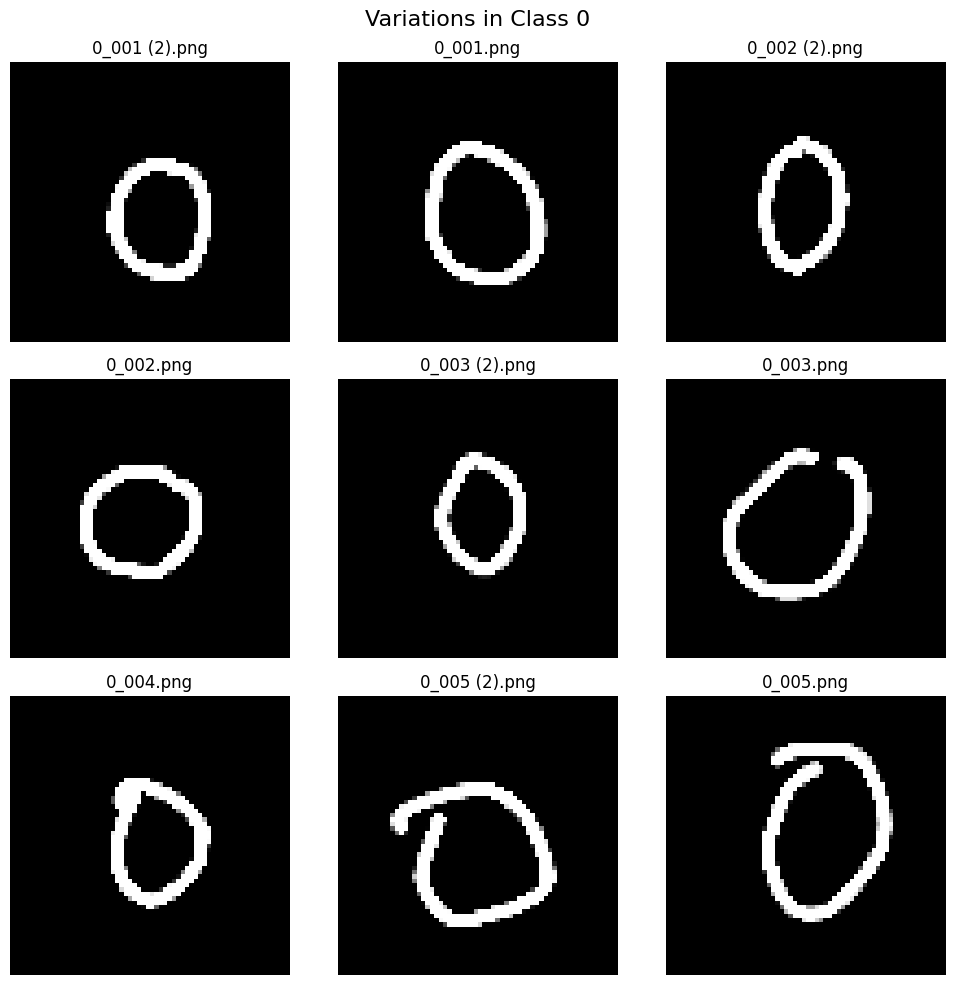

In [18]:

selected_class = classes[0]  # Pick one class
class_path = os.path.join(dataset_path, selected_class)
images = os.listdir(class_path)[:9]  # Show 9 examples

plt.figure(figsize=(10, 10))
for i, img_name in enumerate(images):
    img_path = os.path.join(class_path, img_name)
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.subplot(3, 3, i+1)
    plt.imshow(img_rgb)
    plt.title(f"{img_name}")
    plt.axis('off')
    
plt.suptitle(f"Variations in Class {selected_class}", fontsize=16)
plt.tight_layout()
plt.show()

# 5.Pre Model

In [19]:
from tqdm import tqdm

training_data = []
IMG_SIZE = 28

def create_training_data():
    for category in classes:

        path = os.path.join(dataset_path,category)
        class_num = classes.index(category)

        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

print(len(training_data))

100%|██████████| 300/300 [00:00<00:00, 2681.11it/s]

3000


In [20]:
import random

random.shuffle(training_data)

In [21]:
for sample in training_data[:10]:
    print(sample[1])

3
4
3
0
9
6
1
3
0
5


In [22]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[1000].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) 

[[[[  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]]

  [[  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]]

  [[  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]]

  [[  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [

In [23]:
from tensorflow.keras.utils import to_categorical

In [24]:
y = to_categorical(y, num_classes=10)

In [25]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input

X = X / 255.0

model = Sequential([
    Input(shape=(IMG_SIZE, IMG_SIZE, 1)), 
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=3, validation_split=0.2)


Epoch 1/3
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.4337 - loss: 1.6484 - val_accuracy: 0.9117 - val_loss: 0.2778
Epoch 2/3
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9414 - loss: 0.2013 - val_accuracy: 0.9683 - val_loss: 0.1194
Epoch 3/3
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9881 - loss: 0.0643 - val_accuracy: 0.9833 - val_loss: 0.0592


In [27]:
model.save("digit_model.keras") 

In [28]:
def prepare_image(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    normalized = resized / 255.0
    reshaped = normalized.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    return reshaped

In [31]:
image = prepare_image(r"..\dataset\3\3_001 (2).png")
prediction = model.predict(image)
predicted_label = np.argmax(prediction)

print(f"Predicted digit: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted digit: 3


In [33]:
image = prepare_image(r"..\dataset\8\8_007 (2).png")
prediction = model.predict(image)
predicted_label = np.argmax(prediction)

print(f"Predicted digit: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted digit: 8


In [32]:
image = prepare_image(r"..\dataset\5\5_002 (2).png")
prediction = model.predict(image)
predicted_label = np.argmax(prediction)

print(f"Predicted digit: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted digit: 5


### Test images from outside data set

In [39]:
image = prepare_image(r"..\number9_test.jpg")
prediction = model.predict(image)
predicted_label = np.argmax(prediction)

print(f"Predicted digit: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Predicted digit: 9


In [35]:
image = prepare_image(r"..\PNG image 2.png6 rotated.png")
prediction = model.predict(image)
predicted_label = np.argmax(prediction)

print(f"Predicted digit: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicted digit: 8
